In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import os

In [38]:
path = os.path.dirname(os.getcwd())

In [8]:
df_pg = yf.download('PG', start=date(1995,1,1))

[*********************100%***********************]  1 of 1 completed


In [35]:
columns = [i[:1][0] for i in df_pg.columns.values]
columns.insert(0, 'Date')
columns

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [53]:
df_pg.to_csv(f'{path}/files/pg_historical_data.csv', header=False)

In [54]:
df_pg_reformed = pd.read_csv(f'{path}/files/pg_historical_data.csv', names=columns)

In [55]:
df_pg_reformed.head()

,Date,Close,High,Low,Open,Volume
0,1995-01-03,7.396065,7.410887,7.321956,7.336778,3318400
1,1995-01-04,7.336776,7.425706,7.262667,7.366419,2218800
2,1995-01-05,7.233027,7.321958,7.218205,7.292314,2319600
3,1995-01-06,7.247850,7.307137,7.188563,7.188563,3438000
4,1995-01-09,7.218207,7.307138,7.203385,7.277494,1795200


In [56]:
df_pg_reformed.tail()

,Date,Close,High,Low,Open,Volume
7604,2025-03-20,167.550003,169.210007,166.029999,168.889999,8789200
7605,2025-03-21,166.690002,168.139999,164.119995,167.139999,16027300
7606,2025-03-24,165.649994,166.869995,165.360001,166.429993,6102100
7607,2025-03-25,162.850006,165.369995,162.199997,165.300003,8366700
7608,2025-03-26,166.325104,166.619995,162.990005,163.350006,4849060


In [67]:
# Create a function to get the columns
def build_columns_fpr_df(df: pd.DataFrame) -> list:
    column_names = [i[:1][0] for i in df.columns.values]
    column_names.insert(0, 'Date')
    return column_names

In [68]:
# function to save the data into a csv file
def save_to_csv(df: pd.DataFrame, ticker_name: str) -> None:
    df.to_csv(f'{path}/files/{ticker_name}_historical_data.csv', header=False)

In [71]:
# function to read the new csv file, set index Date
def read_from_csv(ticker_name: str, column_names: list[str]) -> pd.DataFrame:
    return pd.read_csv(f'{path}/files/{ticker_name}_historical_data.csv', names=column_names).set_index('Date')

In [62]:
start_date = date(1995,1,1)
tickers = ['PG', 'MSFT', 'F', 'GE']

In [72]:
# Create a dataframe, download all the tickers from yahoo, create the columns, save data into csv file, read the csv and create new dataframe for very tickers only selecting the Close price
all_df = pd.DataFrame()
for t in tickers:
    my_data = yf.download(t, start=date(1995,1,1))
    columns = build_columns_fpr_df(my_data)
    save_to_csv(my_data, t)
    all_df[t] = read_from_csv(t, columns)['Close']
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [73]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7609 entries, 1995-01-03 to 2025-03-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7609 non-null   float64
 1   MSFT    7609 non-null   float64
 2   F       7609 non-null   float64
 3   GE      7609 non-null   float64
dtypes: float64(4)
memory usage: 297.2+ KB


In [75]:
all_df.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.396064,2.310187,3.456766,20.163145
1995-01-04,7.336782,2.326980,3.549773,20.163145
1995-01-05,7.233025,2.288598,3.518769,20.212566
1995-01-06,7.247850,2.326980,3.518769,20.113728
1995-01-09,7.218204,2.312586,3.580775,19.916044


In [76]:
all_df.tail()

,PG,MSFT,F,GE
Date,,,,
2025-03-20,167.550003,386.839996,10.01,203.929993
2025-03-21,166.690002,391.260010,10.00,204.130005
2025-03-24,165.649994,393.079987,10.25,210.229996
2025-03-25,162.850006,395.160004,10.29,212.130005
2025-03-26,166.580002,389.970001,10.30,207.369995


## Normalization to 100:

P1 / P0 * 100

In [78]:
print(all_df.iloc[0])

PG       7.396064
MSFT     2.310187
F        3.456766
GE      20.163145
Name: 1995-01-03, dtype: float64


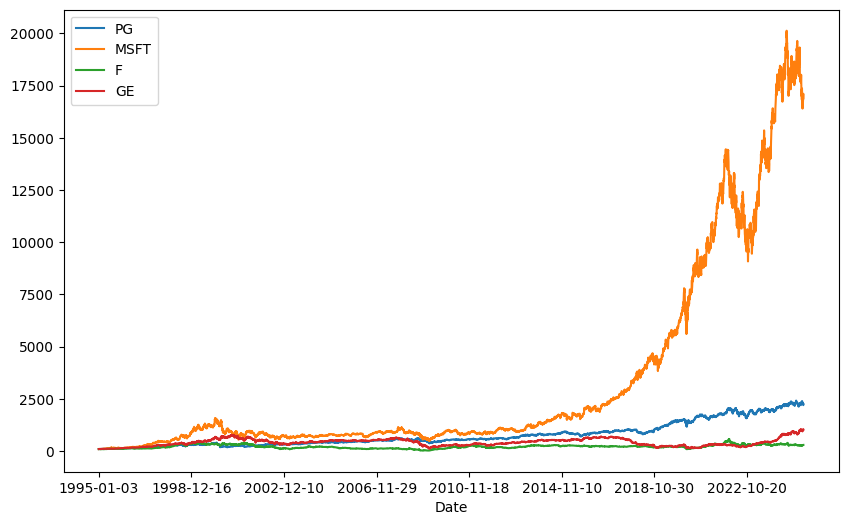

In [90]:
(all_df / all_df.iloc[0] * 100).plot(figsize=(10,6))
plt.show()

## If we do without normalization we have not good landmark

<Axes: xlabel='Date'>

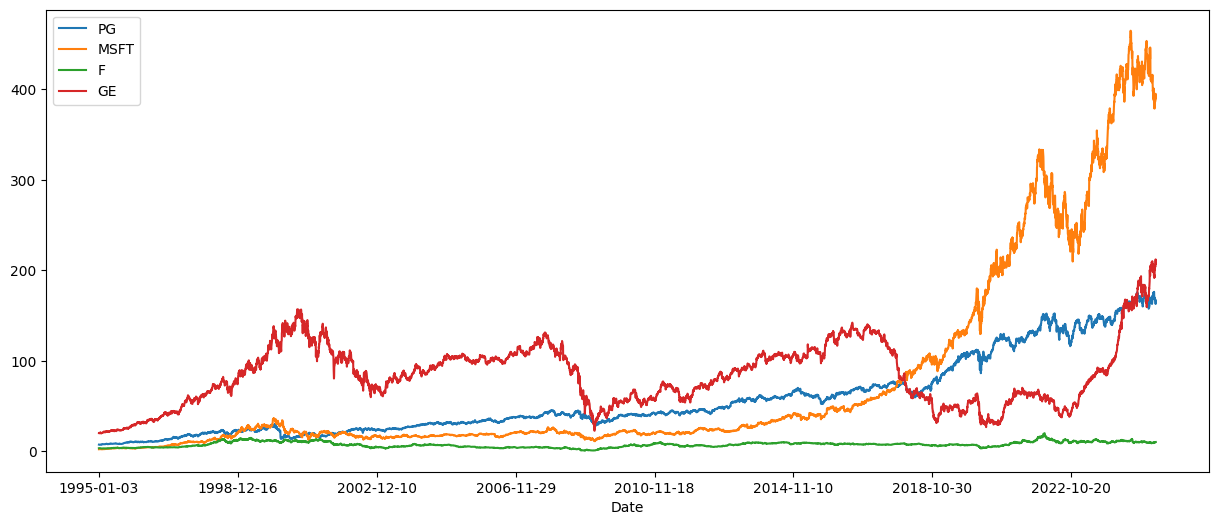

In [86]:
all_df.plot(figsize=(15,6))

In [88]:
print(all_df.loc['1995-01-03'])

PG       7.396064
MSFT     2.310187
F        3.456766
GE      20.163145
Name: 1995-01-03, dtype: float64


In [89]:
print(all_df.iloc[0])

PG       7.396064
MSFT     2.310187
F        3.456766
GE      20.163145
Name: 1995-01-03, dtype: float64


## Calculating the return of a Portfolio of Securities

In [91]:
returns = (all_df / all_df.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016494,-0.008734,0.002451
1995-01-06,0.002050,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [95]:
# Calculate the weights for the portfolio, in this case are 4 tickers, so divide is 0.25
weights = np.array([0.25,0.25,0.25,0.25])

In [96]:
# Calculate the dot product of two arrays
np.dot(returns, weights)

array([        nan,  0.00653992, -0.00922992, ...,  0.01332382,
        0.00033219, -0.00292418], shape=(7609,))

In [98]:
annual_returns = returns.mean() * 250
print(annual_returns)

PG      0.126422
MSFT    0.216257
F       0.115742
GE      0.127247
dtype: float64


In [103]:
print(np.dot(annual_returns, weights))

0.14641676682807486


In [99]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print(pfolio_1)

14.642 %


In [104]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [105]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

14.642 %
16.079 %
